# Lab 1: Day-ahead load prediction for ERCOT (Texas) markets. 

In this lab, you train a neural network to predict 24-hour aggregate load from Texas for a day using history of demands. The goals for this lab are:
1. Load the data and analyze to find patterns.
2. Define a neural network for the regression. Try different number of layers, learning rates, linear v/s nonlinear regression, activation functions, number of epochs, etc.
3. Explore the effects of wind energy on load prediction. 

In [13]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import random
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

# The following line suppresses certain warnings.
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

## Load the ERCOT data from 2015.

The load data is given in the column named 'ERCOT Load, MW' in the csv file provided.

In [14]:
year = 2015
dfDemand = pd.read_csv("ERCOT_Hourly_Wind_Output_" + str(year) + ".csv")

demands = dfDemand['ERCOT Load, MW']

# Count the number of days for which we have demand data.
numberOfDays = int(len(demands)/24)
print("Hourly demand data loaded for %d days." % numberOfDays)


Hourly demand data loaded for 365 days.


## Understand the data.

It is always useful to get accustomed to the data you are trying to learn. Visualize it if you can.

#### Q1. How does load vary over the year in Texas?

Text(0, 0.5, 'Net demand of Texas (in MW)')

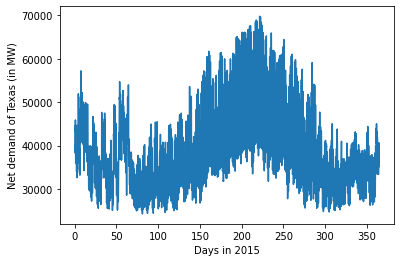

In [15]:
fig = plt.figure()

plt.plot([hour/24 for hour in range(numberOfDays * 24)], demands.values)
plt.xlabel("Days in " + str(year))
plt.ylabel("Net demand of Texas (in MW)")

**Fact.** A significant portion of the demand is usually thermal, i.e., for air conditioners and heating systems.

**Question (10 points).** From the above plot, what can you infer about the climate of Texas? What would you expect if you plotted the same in Illinois? 

- The temperuature in summer is high in Texas, so the usage of power in summer is higher than other season because of air conditioners. It is also cold in winter, so the power usage in winter is higher than spring and fall because of heating system.
- I expect the power usage trend of Illinois is similar to Texas, maybe the power usage in winter is closer to summer because the winter in Illinois is colder than Texas.


#### Q2. How does day of week affect the load profiles?

The first day in the first plot is Jan 31, 2015.
Day 1 was a Saturday.


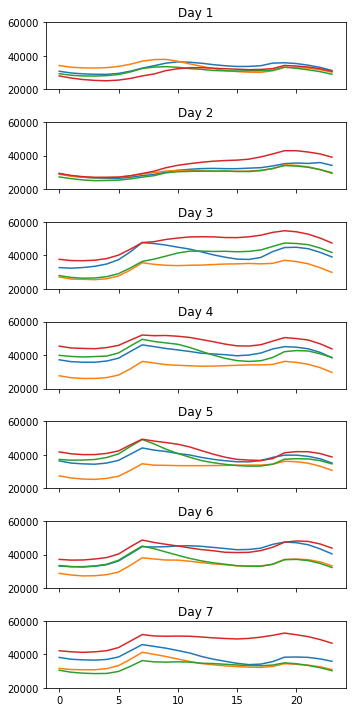

In [16]:
# Plot the load data of the same day of the week over several weeks.
month = 1
day = 31

dayStart = datetime.date(year, month, day).timetuple().tm_yday - 1
numberOfWeeks = 4

DayOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
print("The first day in the first plot is Jan 31, " + str(year) + ".")
print("Day 1", "was a", DayOfWeek[datetime.date(year, month, day).weekday()] + ".")

fig, axs = plt.subplots(7, 1, sharex=True, figsize=(5,10))
axs = axs.ravel()

for dayInFirstWeek in range(7):
    for week in range(numberOfWeeks):

        axs[dayInFirstWeek].plot(range(24), dfDemand.loc[(dayStart + 7 * week + dayInFirstWeek) * 24: 
                                                         (dayStart + 7 * week + dayInFirstWeek + 1) * 24 - 1, 
                                                         'ERCOT Load, MW'].values.flatten())
    axs[dayInFirstWeek].set_ylim(bottom=20000, top=60000)
    axs[dayInFirstWeek].set_title("Day " + str(dayInFirstWeek + 1))

fig.tight_layout()
plt.show()

**Question (15 points).** Can you find any discernible change in the load profiles of different days of the week? Redo the above exercise for the months of August and September. Make 'Day 1' correspond to August 15th. What do you observe differently? 

- For different days of the week in January
    - The load profiles of weekdays are similar, and the load profiles of weekends are similar.
    - The load profiles of weekdays and weekends are different.
    - The power usage of weekends are lower than weekdays, probably because people like to go outside in weekends, which cause lower power consumpsion.
- For different days of the week in Augest and September
    - The load profiles of weekdays are and weekends are all similar (every day is similer)

The first day in the first plot is August 15, 2015.
Day 1  was a  Saturday.


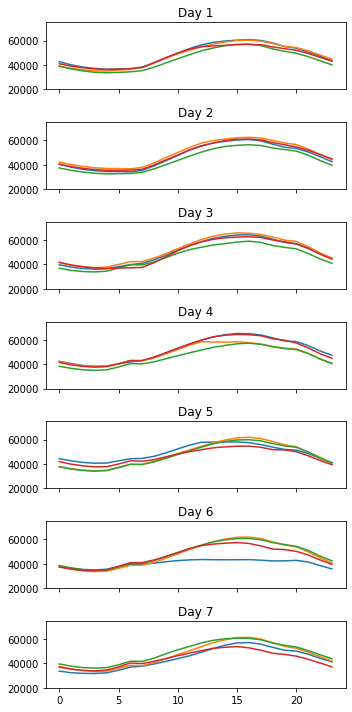

In [17]:
# Modify the following code

# Plot the load data of the same day of the week over several weeks.
month = 8
day = 15

dayStart = datetime.date(year, month, day).timetuple().tm_yday - 1
numberOfWeeks = 4

DayOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
print("The first day in the first plot is August 15, " + str(year) + ".")
print("Day 1", " was a ", DayOfWeek[datetime.date(year, month, day).weekday()] + ".")

fig, axs = plt.subplots(7, 1, sharex=True, figsize=(5,10))
axs = axs.ravel()

for dayInFirstWeek in range(7):
    for week in range(numberOfWeeks):

        axs[dayInFirstWeek].plot(range(24), dfDemand.loc[(dayStart + 7 * week + dayInFirstWeek) * 24: 
                                                         (dayStart + 7 * week + dayInFirstWeek + 1) * 24 - 1, 
                                                         'ERCOT Load, MW'].values.flatten())
    axs[dayInFirstWeek].set_ylim(bottom=20000, top=75000)
    axs[dayInFirstWeek].set_title("Day " + str(dayInFirstWeek + 1))

fig.tight_layout()
plt.show()

The first day in the first plot is September 12, 2015.
Day 1  was a  Saturday.


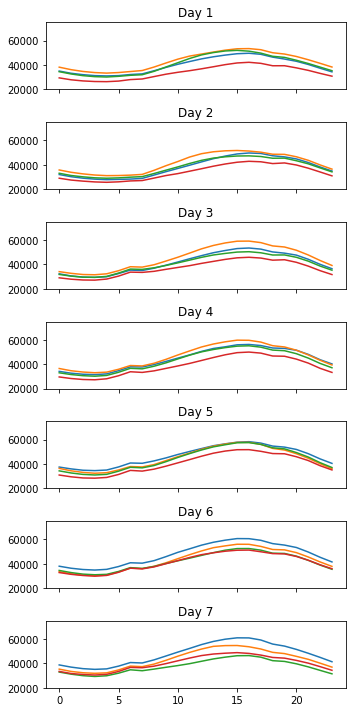

In [18]:
# Modify the following code

# Plot the load data of the same day of the week over several weeks.
month = 9
day = 12

dayStart = datetime.date(year, month, day).timetuple().tm_yday - 1
numberOfWeeks = 4

DayOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
print("The first day in the first plot is September 12, " + str(year) + ".")
print("Day 1", " was a ", DayOfWeek[datetime.date(year, month, day).weekday()] + ".")

fig, axs = plt.subplots(7, 1, sharex=True, figsize=(5,10))
axs = axs.ravel()

for dayInFirstWeek in range(7):
    for week in range(numberOfWeeks):

        axs[dayInFirstWeek].plot(range(24), dfDemand.loc[(dayStart + 7 * week + dayInFirstWeek) * 24: 
                                                         (dayStart + 7 * week + dayInFirstWeek + 1) * 24 - 1, 
                                                         'ERCOT Load, MW'].values.flatten())
    axs[dayInFirstWeek].set_ylim(bottom=20000, top=75000)
    axs[dayInFirstWeek].set_title("Day " + str(dayInFirstWeek + 1))

fig.tight_layout()
plt.show()

## Define the demand prediction module.

Use past demand profiles to predict demands a day in advance. We draw two conclusions from the above analysis:
1. Demand profiles have seasonal effects. Therefore, data from the past few days will help in predicting the demands tomorrow.
2. Demand profiles have weekly dependencies. Therefore, data from the same days but a week or two before can be useful in load prediction.

How much past data you want to train over depends on two considerations:
1. Which data in the past is useful in prediction?
2. How complex you want your training process to be? The more features of past data you want to train on, the more complex your neural network should be, and it will require more time to train it.

To strike a balance, use the demand profile from $d-7, d-2, d-1$ to predict the load profile of day $d$.

In [19]:
daysToTrainOn = [-7, -2, -1]
rangeOfDays = range(-np.min(daysToTrainOn), numberOfDays)

X = [np.concatenate([dfDemand.loc[(day + h) * 24: (day + h + 1) * 24 -1, 'ERCOT Load, MW'].values.flatten()
     for h in daysToTrainOn]) for day in rangeOfDays]
Y = [dfDemand.loc[day * 24: (day + 1) * 24 - 1, 'ERCOT Load, MW'].values.flatten() for day in rangeOfDays]


When you perform regression, it is often desirable to scale the inputs so that it has zero mean and unit variance. Other types of scaling are possible. Here, we cheat a little and scale both the training and test data together. Ideally, they should be scaled separately.

Split the data into two sets: training set and testing set. Train the neural network on the training set, and test how well it performs on the testing set. You should typically never sample from the training set to test your algorithms. The learnt model for prediction should work well on data that the algorithm has never encountered before.

The function 'train_test_split' helps you to split the data into two parts, where 'test_size'
indicates the fraction of the data you want to test on.

In [20]:
X = preprocessing.StandardScaler().fit_transform(X)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)

trainX = trainX.astype(np.float32)
testX = testX.astype(np.float32)
trainY = np.array(trainY)
testY = np.array(testY)

print("Scaled and split the data into two parts:")

nTrain = np.shape(trainX)[0]
nTest = np.shape(testX)[0]

print("Neural network will train on data from %d days, and test on %d days." % (nTrain, nTest))


Scaled and split the data into two parts:
Neural network will train on data from 286 days, and test on 72 days.


### Design the neural network (NN) for demand prediction with only one hidden layer.

**Question (25 points). Insert code to design the NN and its optimizer (use the relu function)** 

In [25]:
nHidden = 150

# Store the dimension of each row of 'X' in 'nDimX' and that of 'Y' in 'nDimY' .
nDimX = np.shape(trainX)[1]
nDimY = np.shape(trainY)[1]

# Construct the neural network using relu
inputs = keras.Input(shape=(nDimX,), name="input")
nn_layer = keras.layers.Dense(nHidden, name="dense_1", activation=tf.nn.relu, use_bias=True, bias_initializer='zeros')(inputs)
outputs = keras.layers.Dense(nDimY, name="output", activation=tf.nn.relu)(nn_layer)

model = keras.Model(inputs=inputs, outputs=outputs)

# Define the loss function (MSE) and the optimizer (AdagradOptimizer).

# insert code
adagred = keras.optimizers.Adagrad(learning_rate=0.01, epsilon=None, decay=0.0)
model.compile(
    optimizer=adagred,
    loss='mean_squared_error',
    metrics=['accuracy']
)



### Train the neural network via Keras.

Create the training module for the NN. 

Keras is a user-friendly framework to define, train and test neural networks. Check their page out for more details. https://keras.io/ 

Feed the training data in batches of size 'batchSize'.Usually, going through the training data once does not train your NN. You train over the same data multiple times. More precisely, train it 'nEpochs' times. It is similar to the idea that you never learn a material by reading through it once!

**Question (20 points). Insert code to define the training module**

In [26]:
batchSize = 10
nEpochs = 3000

# Train the model
gpuList = tf.config.list_physical_devices('GPU')
if(len(gpuList) > 0):
    print('Using GPU')
    print('GPU name: ', gpuList )
    tf.debugging.set_log_device_placement(True)

print("Fit model on training data")

history = model.fit(trainX, trainY, epochs=nEpochs, batch_size=batchSize)


Fit model on training data
Epoch 1/3000
29/29 [==============================] - 0s 755us/step - loss: 1656278912.0000 - accuracy: 0.1154
Epoch 2/3000
29/29 [==============================] - 0s 735us/step - loss: 1650640000.0000 - accuracy: 0.1329
Epoch 3/3000
29/29 [==============================] - 0s 743us/step - loss: 1644322944.0000 - accuracy: 0.1329
Epoch 4/3000
29/29 [==============================] - 0s 787us/step - loss: 1638075392.0000 - accuracy: 0.1364
Epoch 5/3000
29/29 [==============================] - 0s 870us/step - loss: 1631833856.0000 - accuracy: 0.1329
Epoch 6/3000
29/29 [==============================] - 0s 934us/step - loss: 1625576832.0000 - accuracy: 0.1329
Epoch 7/3000
29/29 [==============================] - 0s 938us/step - loss: 1619315968.0000 - accuracy: 0.1329
Epoch 8/3000
29/29 [==============================] - 0s 941us/step - loss: 1612985728.0000 - accuracy: 0.1364
Epoch 9/3000
29/29 [==============================] - 0s 924us/step - loss: 160667289

### Let us visualize the results.

**Question (5 points). Usine the NN to predict on test data**


3/3 [==============================] - 0s 2ms/step - loss: 340388736.0000 - accuracy: 0.2778
accuracy 0.2777777910232544


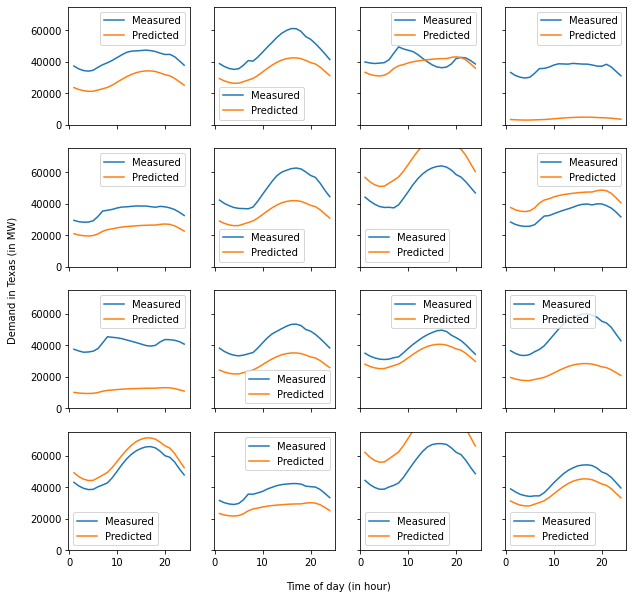

In [28]:
# Output the accuracy of the regressor on the test data.

predictedY = model.predict(testX)
evaluate = model.evaluate(testX, testY)
print('accuracy', evaluate[1])

# Plot the predicted load and compare against the actual load from the test data.
assert(nTest >= 16)
days = random.sample(range(nTest), 16)

fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(10,10))
axs = axs.ravel()


for dd, day in enumerate(days):
    testYDay = testY[day]
    predictedYDay = predictedY[day]

    l1 = axs[dd].plot(range(1, 25), testYDay, label='Measured')
    l2 = axs[dd].plot(range(1, 25), predictedYDay, label='Predicted')
    
    axs[dd].set_ylim(bottom=0, top=75000)
    axs[dd].legend()

fig.text(0.5, 0.07, 'Time of day (in hour)', ha='center')
fig.text(0.04, 0.5, 'Demand in Texas (in MW)', va='center', rotation='vertical')

plt.show()

**Question (10 points).** Explore how the number of epochs affects the accuracy and speed of training. Start with 10 epochs, and increase it to 100, 1000, 5000, 10000, and maybe more (do not exceed 20000 unless you have a powerful computer, you are only required to do up to 10000 for this lab). Make comments based on your observations. As an engineer, what is your favorite number of epochs, and why? 

BatchSize = 1
| Epochs | Time (s) | Testing Accuracy |
| ------ | -------- | ---------------- |
| 10     | 9.5      | 0.028            |
| 100    | 81       | 0.069            |
| 1000   | 699      | 0.252            |
| 3000   | 2242     | 0.333            |
| 5000   | 3512     | 0.333            |
| 10000  | 7031     | 0.333            |

BatchSize = 10
| Epochs | Time (s) | Testing Accuracy |
| ------ | -------- | ---------------- |
| 10     | 2.2      | 0.0              |
| 100    | 12       | 0.111            |
| 1000   | 111      | 0.222            |
| 3000   | 350      | 0.319            |
| 5000   | 607      | 0.319            |
| 10000  | 1223     | 0.319            |

- The higher the epochs is, the higher the testing accuracy will be.
- The higher the epochs is, the slower the training process will be.
- The training time is propotional to epchos.
- My favorite number of epochs is 3000 with batchsize=10, because the testing accuracy is the high enough, and training time is short enough.

**Question (15 points).** Fix the number of epochs to your favorite one. Then, add another layer to the network. Discuss what your observe in terms of speed and accuracy. 

**Your answer (comments here, code below). Your code should show the results for the case with an additional hidden layer. Go back to the codes above for the 1 layer case and run it again for the same number of epochs/neurons**
| layer | Time (s) | Testing Accuracy |
| ----- | -------- | ---------------- |
| 1     | 350      | 0.319            |
| 2     | 452      | 0.375            |

- The training time is longer for 2 hidden layer model. 
- The testing accuracy is slightly higher for 2 hidden layer model.

In [31]:
nHidden = 150

# Store the dimension of each row of 'X' in 'nDimX' and that of 'Y' in 'nDimY' .
nDimX = np.shape(trainX)[1]
nDimY = np.shape(trainY)[1]

# Construct the neural network using relu
inputs = keras.Input(shape=(nDimX,), name="input")
nn_layer_1 = keras.layers.Dense(nHidden, name="dense_1", activation=tf.nn.relu, use_bias=True, bias_initializer='zeros')(inputs)
nn_layer_2 = keras.layers.Dense(nHidden, name="dense_2", activation=tf.nn.relu, use_bias=True, bias_initializer='zeros')(nn_layer_1)
outputs = keras.layers.Dense(nDimY, name="output", activation=tf.nn.relu)(nn_layer_2)

model = keras.Model(inputs=inputs, outputs=outputs)

# Define the loss function (MSE) and the optimizer (AdagradOptimizer).

# insert code
adagred = keras.optimizers.Adagrad(epsilon=None, decay=0.0)
model.compile(
    optimizer=adagred,
    loss='mean_squared_error',
    metrics=['accuracy']
)

In [32]:
batchSize = 10
nEpochs = 3000

# Train the model
gpuList = tf.config.list_physical_devices('GPU')
if(len(gpuList) > 0):
    print('Using GPU')
    print('GPU name: ', gpuList )
    tf.debugging.set_log_device_placement(True)

print("Fit model on training data")

history = model.fit(trainX, trainY, epochs=nEpochs, batch_size=batchSize)

Fit model on training data
Epoch 1/3000
29/29 [==============================] - 0s 980us/step - loss: 1658209408.0000 - accuracy: 0.1678
Epoch 2/3000
29/29 [==============================] - 0s 809us/step - loss: 1658076160.0000 - accuracy: 0.1119
Epoch 3/3000
29/29 [==============================] - 0s 946us/step - loss: 1657882496.0000 - accuracy: 0.0175
Epoch 4/3000
29/29 [==============================] - 0s 836us/step - loss: 1657616384.0000 - accuracy: 0.0140
Epoch 5/3000
29/29 [==============================] - 0s 904us/step - loss: 1657288448.0000 - accuracy: 0.0105
Epoch 6/3000
29/29 [==============================] - 0s 885us/step - loss: 1656902912.0000 - accuracy: 0.0140
Epoch 7/3000
29/29 [==============================] - 0s 895us/step - loss: 1656463232.0000 - accuracy: 0.0140
Epoch 8/3000
29/29 [==============================] - 0s 1ms/step - loss: 1655974784.0000 - accuracy: 0.0140
Epoch 9/3000
29/29 [==============================] - 0s 886us/step - loss: 1655442176.

3/3 [==============================] - 0s 923us/step - loss: 549264384.0000 - accuracy: 0.3750
accuracy 0.375


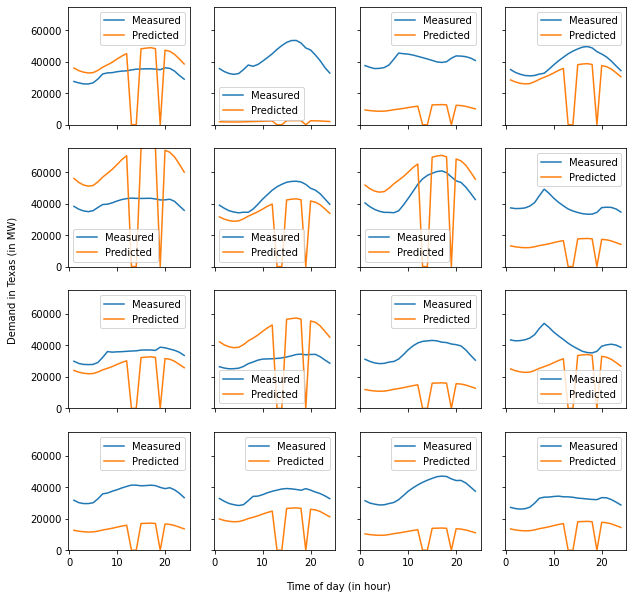

In [34]:
# Output the accuracy of the regressor on the test data.

predictedY = model.predict(testX)
evaluate = model.evaluate(testX, testY)
print('accuracy', evaluate[1])

# Plot the predicted load and compare against the actual load from the test data.
assert(nTest >= 16)
days = random.sample(range(nTest), 16)

fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(10,10))
axs = axs.ravel()


for dd, day in enumerate(days):
    testYDay = testY[day]
    predictedYDay = predictedY[day]

    l1 = axs[dd].plot(range(1, 25), testYDay, label='Measured')
    l2 = axs[dd].plot(range(1, 25), predictedYDay, label='Predicted')
    
    axs[dd].set_ylim(bottom=0, top=75000)
    axs[dd].legend()

fig.text(0.5, 0.07, 'Time of day (in hour)', ha='center')
fig.text(0.04, 0.5, 'Demand in Texas (in MW)', va='center', rotation='vertical')

plt.show()

### The effect of wind energy (bonus).

In [ ]:
#Let's check the raw data 
dfDemand = pd.read_csv("ERCOT_Hourly_Wind_Output_" + str(year) + ".csv")
dfDemand[:]

,time-date stamp,Date,"ERCOT Load, MW","Total Wind Output, MW","Total Wind Installed, MW","Wind Output, % of Load","Wind Output, % of Installed",1-hr MW change,1-hr % change
0,1/1/15 0:00,1-Jan,39932,871,12730,2.2,6.8,NaN,NaN
1,1/1/15 1:00,1-Jan,39134,724,12730,1.8,5.7,-147.0,-16.9
2,1/1/15 2:00,1-Jan,38560,596,12730,1.5,4.7,-127.0,-17.6
3,1/1/15 3:00,1-Jan,38334,486,12730,1.3,3.8,-110.0,-18.5
4,1/1/15 4:00,1-Jan,38392,651,12730,1.7,5.1,165.0,33.8
...,...,...,...,...,...,...,...,...,...
8755,12/31/15 19:00,31-Dec,39909,3825,16170,9.6,23.7,484.0,14.5
8756,12/31/15 20:00,31-Dec,38737,4626,16170,11.9,28.6,801.0,20.9
8757,12/31/15 21:00,31-Dec,37588,4958,16170,13.2,30.7,332.0,7.2
8758,12/31/15 22:00,31-Dec,36356,4699,16170,12.9,29.1,-259.0,-5.2


Note that in addition to the load data, we have some wind data! 

**Question (20 points).** Subtract the wind data from the load, and redo the above experiment and observe how does wind energy affect the forecasting process. How does the accuracy change? Why?

**Your answer (comments here, code below).**
- The testing accuracy of Wind Load is higher than ERCOT Load
- I think the reason is that wind load data is more predictable, because wind load is influenced mostly by climate, while ERCOT Load is influenced by many factors.

In [57]:
daysToTrainOn = [-7, -2, -1]
rangeOfDays = range(-np.min(daysToTrainOn), numberOfDays)

X = [np.concatenate([dfDemand.loc[(day + h) * 24: (day + h + 1) * 24 -1, 'Total Wind Output, MW'].values.flatten()
     for h in daysToTrainOn]) for day in rangeOfDays]
Y = [dfDemand.loc[day * 24: (day + 1) * 24 - 1, 'Total Wind Output, MW'].values.flatten() for day in rangeOfDays]

In [58]:
X = preprocessing.StandardScaler().fit_transform(X)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)

trainX = trainX.astype(np.float32)
testX = testX.astype(np.float32)
trainY = np.array(trainY)
testY = np.array(testY)

print("Scaled and split the data into two parts:")

nTrain = np.shape(trainX)[0]
nTest = np.shape(testX)[0]

print("Neural network will train on data from %d days, and test on %d days." % (nTrain, nTest))

Scaled and split the data into two parts:
Neural network will train on data from 286 days, and test on 72 days.


In [59]:
nHidden = 150

# Store the dimension of each row of 'X' in 'nDimX' and that of 'Y' in 'nDimY' .
nDimX = np.shape(trainX)[1]
nDimY = np.shape(trainY)[1]

# Construct the neural network using relu
inputs = keras.Input(shape=(nDimX,), name="input")
nn_layer = keras.layers.Dense(nHidden, name="dense_1", activation=tf.nn.relu, use_bias=True, bias_initializer='zeros')(inputs)
outputs = keras.layers.Dense(nDimY, name="output", activation=tf.nn.relu)(nn_layer)

model = keras.Model(inputs=inputs, outputs=outputs)

# Define the loss function (MSE) and the optimizer (AdagradOptimizer).

# insert code
adagred = keras.optimizers.Adagrad(learning_rate=0.01, epsilon=None, decay=0.0)
model.compile(
    optimizer=adagred,
    loss='mean_squared_error',
    metrics=['accuracy']
)

In [60]:
batchSize = 10
nEpochs = 3000

# Train the model
gpuList = tf.config.list_physical_devices('GPU')
if(len(gpuList) > 0):
    print('Using GPU')
    print('GPU name: ', gpuList )
    tf.debugging.set_log_device_placement(True)

print("Fit model on training data")

history = model.fit(trainX, trainY, epochs=nEpochs, batch_size=batchSize)


Fit model on training data
Epoch 1/3000
29/29 [==============================] - 0s 549us/step - loss: 29988754.0000 - accuracy: 0.0734
Epoch 2/3000
29/29 [==============================] - 0s 654us/step - loss: 29688798.0000 - accuracy: 0.1049
Epoch 3/3000
29/29 [==============================] - 0s 755us/step - loss: 29353334.0000 - accuracy: 0.0909
Epoch 4/3000
29/29 [==============================] - 0s 639us/step - loss: 29010450.0000 - accuracy: 0.0874
Epoch 5/3000
29/29 [==============================] - 0s 669us/step - loss: 28673066.0000 - accuracy: 0.0944
Epoch 6/3000
29/29 [==============================] - 0s 692us/step - loss: 28338308.0000 - accuracy: 0.0909
Epoch 7/3000
29/29 [==============================] - 0s 737us/step - loss: 28002800.0000 - accuracy: 0.0979
Epoch 8/3000
29/29 [==============================] - 0s 753us/step - loss: 27672824.0000 - accuracy: 0.0874
Epoch 9/3000
29/29 [==============================] - 0s 863us/step - loss: 27346578.0000 - accuracy:

3/3 [==============================] - 0s 1ms/step - loss: 5305714.5000 - accuracy: 0.3750
accuracy 0.375


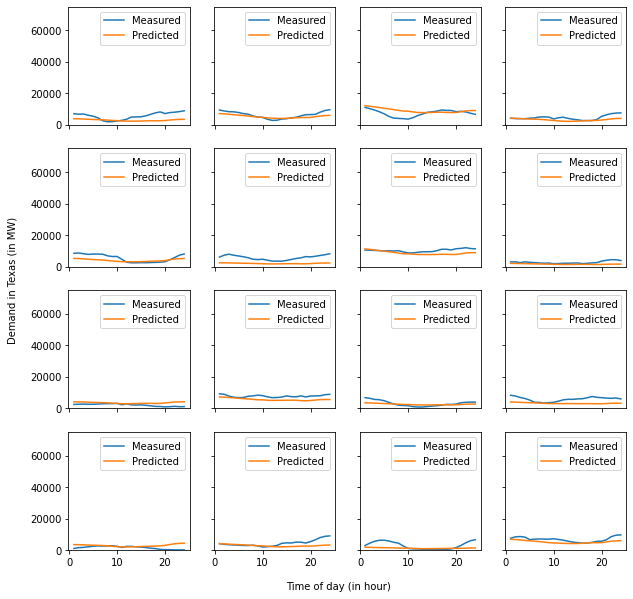

In [61]:
# Output the accuracy of the regressor on the test data.

predictedY = model.predict(testX)
evaluate = model.evaluate(testX, testY)
print('accuracy', evaluate[1])

# Plot the predicted load and compare against the actual load from the test data.
assert(nTest >= 16)
days = random.sample(range(nTest), 16)

fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(10,10))
axs = axs.ravel()


for dd, day in enumerate(days):
    testYDay = testY[day]
    predictedYDay = predictedY[day]

    l1 = axs[dd].plot(range(1, 25), testYDay, label='Measured')
    l2 = axs[dd].plot(range(1, 25), predictedYDay, label='Predicted')
    
    axs[dd].set_ylim(bottom=0, top=75000)
    axs[dd].legend()

fig.text(0.5, 0.07, 'Time of day (in hour)', ha='center')
fig.text(0.04, 0.5, 'Demand in Texas (in MW)', va='center', rotation='vertical')

plt.show()